# TaylorF2 upto 3.5PN
## minimum-frequency = 10Hz

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [3]:
result = bilby.result.read_in_result("GW170817TaylorF2_data0_1187008882-4_analysis_H1L1V1_dynesty_result.json")

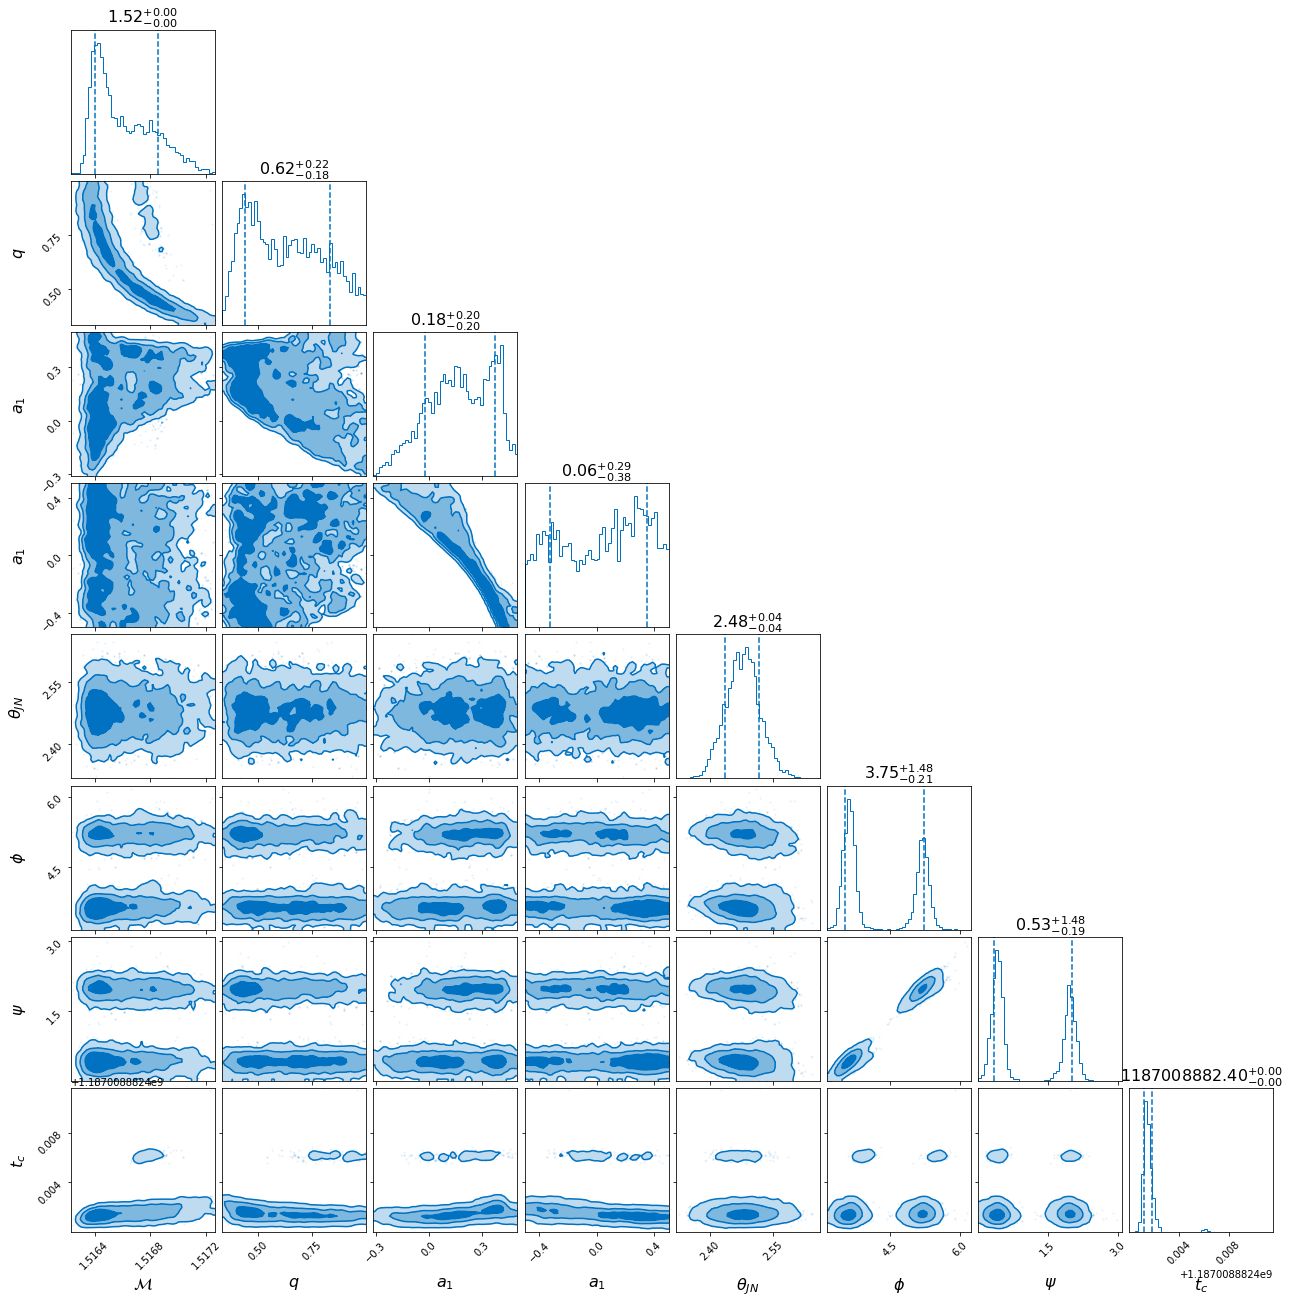

In [4]:
result.plot_corner(outdir='.')

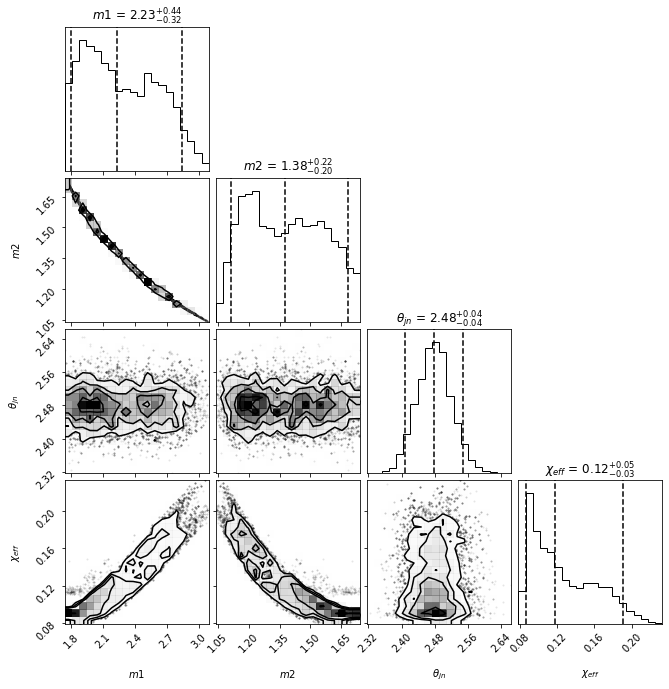

In [7]:
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
theta_jn = result.posterior["theta_jn"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
a_1 = result.posterior["a_1"].values
a_2 = result.posterior["a_2"].values
chi_eff = (a_1*m1+a_2*m2)/(m1+m2)

data = np.transpose(np.array([m1, m2,theta_jn,chi_eff]))
figure = corner.corner(data, labels=[r"$m1$", r"$m2$", r"$\theta_{jn}$", r"$\chi_{eff}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

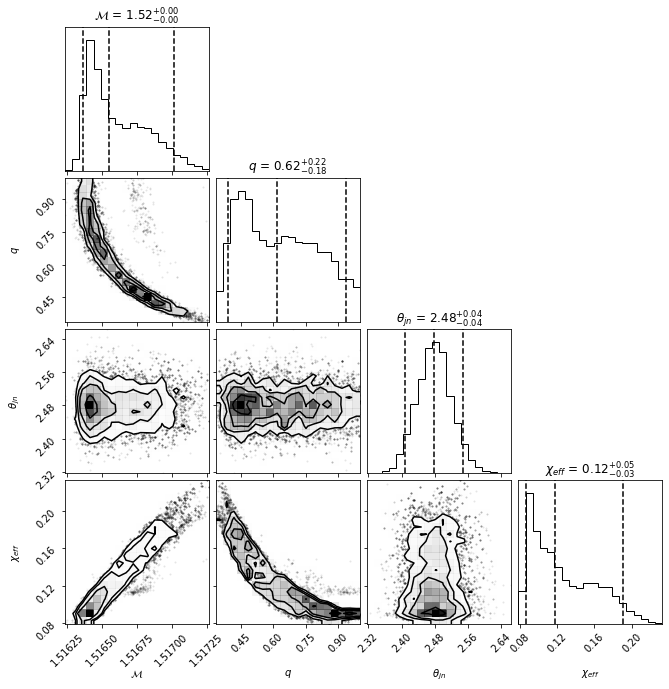

In [8]:
data = np.transpose(np.array([chirp_mass,mass_ratio,theta_jn,chi_eff]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$", r"$\theta_{jn}$", r"$\chi_{eff}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})